<a href="https://colab.research.google.com/github/Helios109/Verylimitedtoystore/blob/main/COMPLETED_3_Your_first_Classification_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

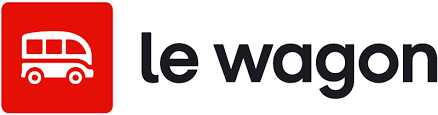

# The Titanic dataset

For your first **classification** task of the week, you'll work on a classic ML dataset - Titanic passengers!

The model we'll be using is **Logistic Regression**. \

We won't dwell too much today on why this model is best suited, but just remember that we're trying to classify something (whether a passenger survived or not), which is what **Logistic Regression** does.

## Import the data

Import the Titanic dataset using this link: https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv


Load it into a `df`variable.


<details>
    <summary>Tips 💯</summary>
    
Same as in the previous challenge, you can download the file and upload it to Google Colab, or you can directly but the download link inside the `pd.read_csv()` function!
    
    
</details>


In [1]:
import pandas as pd

url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv"
df = pd.read_csv(url)

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Inspect the data

Have a look at the imported dataset! Try to scope out potential features and targets.

In [3]:
import pandas as pd

# Display DataFrame as a table #
print(df)




     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## Pick X and y

Ok, now that you've visualized the DataFrame, let's create **X** and **y**.


Try to model whether a passenger **Survived** or **not** based on the following features:

- `Pclass`: The class they were in
- `SibSp`: The number of siblings or spouses on the Titanic
- `Parch`: The number of parents or children on the Titanic
- `Fare`: How much they paid for their ticket

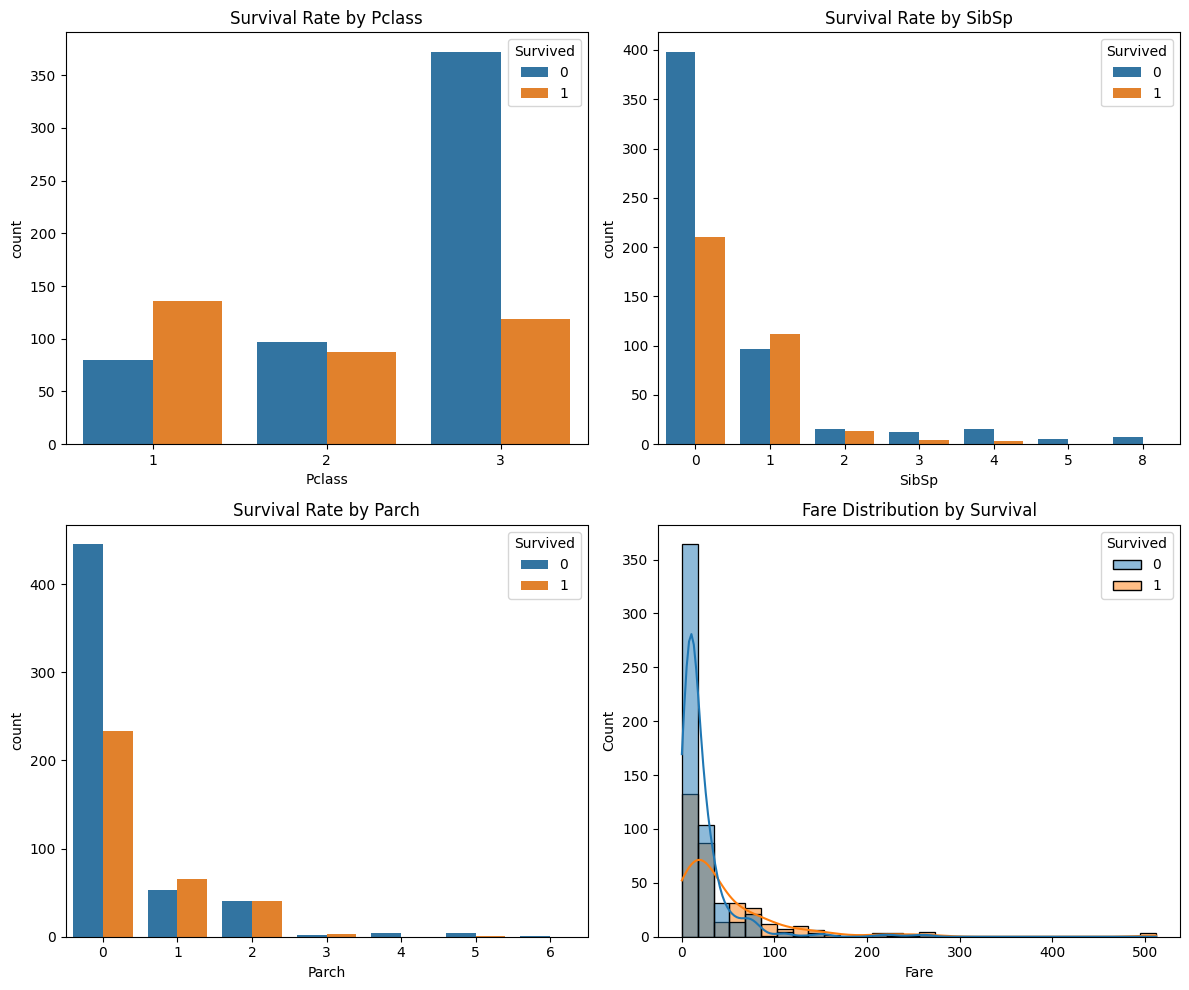

In [5]:
# Select features (X) and target variable (y)#
X = df[['Pclass', 'SibSp', 'Parch', 'Fare']]  # Features #
y = df['Survived']  # Target variable #

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis #
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot survival rate based on Pclass #
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Survival Rate by Pclass')

# Plot survival rate based on SibSp #
sns.countplot(x='SibSp', hue='Survived', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Survival Rate by SibSp')

# Plot survival rate based on Parch #
sns.countplot(x='Parch', hue='Survived', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Survival Rate by Parch')

# Plot fare distribution for survived and not survived passengers #
sns.histplot(df, x='Fare', hue='Survived', bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution by Survival')

# Adjust layout #
plt.tight_layout()
plt.show()


## Train Test Split

Remember when we said that splitting the data is **one of the most important things in Machine Learning?**

Use Sklearn's `train_test_split` function to split your data into `X_train`, `X_test`, `y_train` and `y_test`.


- Use `random_state=0` to compare your final results with your buddy's results.


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.#



## Normalization

Now we need to normalize our features.

Use Sklearn's `Standard Scaler` to bring all of the features to the same scale.

Save your scaled features to two new variables named `X_train_scaled`and `X_test_scaled`.


In [7]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler #
scaler = StandardScaler()

# Fit and transform the scaler on the training data #
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler #
X_test_scaled = scaler.transform(X_test)


## Modelling

Now we can actually run our ML model!

Import, instantiate and fit a **Logistic Regression** model on the training data.


In [9]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model #
logreg_model = LogisticRegression()

# Fit the model on the training data #
logreg_model.fit(X_train_scaled, y_train)


LogisticRegression()

## Model Evaluation

Score your fitted model on your **test dataset**.

In [11]:
# Score the fitted model on the test dataset #
accuracy = logreg_model.score(X_test_scaled, y_test)
print("Accuracy on the test dataset:", accuracy)



Accuracy on the test dataset: 0.7150837988826816


How can we interpret this 71% score ?

<details>
<summary>Answer 💡</summary>

The default scoring metric for a **Logistic Regression** model is called the `accuracy`. \
It basically means that when running predictions on our test set, 71% of the returned values would be correctly predicted. You will get more information on the scoring metrics on future lectures.

</details>

## Prediction


We've found records of a passenger that weren't in the original dataset!

Use the model we've just created to predict whether they would have survived or not!


<details>
    <summary>Hint 🔍</summary>
    
Don't forget to normalize the data, but don't fit your scaler on this new data, just transform it (otherwise, you're causing **data leakage**).
    
     
</details>

In [12]:
new_record = pd.DataFrame({"Pclass" : [1], "SibSp" : [0], "Parch" : [1], "Fare" : [65]})
new_record

,Pclass,SibSp,Parch,Fare
0,1,0,1,65


In [16]:
# Import pandas #
import pandas as pd

# Define the new record #
new_record = pd.DataFrame({"Pclass": [1], "SibSp": [0], "Parch": [1], "Fare": [65]})

# Transform the new record using the previously fitted scaler #
new_record_scaled = scaler.transform(new_record)

# Predict survival using the logistic regression model #
survival_prediction = logreg_model.predict(new_record_scaled)

print("Predicted survival for the new passenger:", survival_prediction[0])



Predicted survival for the new passenger: 1


How do you interpret the result?


We can assume that a predicted survival outcome of 1 means that the model predicts that the new passenger would have survived the Titanic disaster. As in binary classification the predicted values typically correspond to one of the two classes: 0 (not survived) or 1 (survived).

**Congratulations on training your first classification model!** 🎉
